##### Count the amount of each subcategory

In [3]:
import os
import pandas as pd

# Folder path with categorized CSVs
folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data"
subcategory_counts = {}

# Iterate over all CSV files in the folder
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder, filename)
        try:
            df = pd.read_csv(file_path)
            if "Subcategory" in df.columns:
                counts = df["Subcategory"].value_counts()
                for subcat, count in counts.items():
                    subcategory_counts[subcat] = subcategory_counts.get(subcat, 0) + count
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Convert to DataFrame for display
subcategory_df = pd.DataFrame(list(subcategory_counts.items()), columns=["Subcategory", "Count"])
subcategory_df = subcategory_df.sort_values(by="Count", ascending=False)

print(subcategory_df)


                                   Subcategory  Count
0        Accountability and Legal Consequences    600
1           Civilians on the Battlefield (COB)    600
2                Cover-ups and False Reporting    600
3      Discrimination and Cultural Sensitivity    600
4          Dual Loyalty and Conflicting Duties    600
5               Escalation of Force Procedures    600
6             Mission-Specific ROE Constraints    600
7             Moral Courage and Whistleblowing    600
8                        Orders vs. Conscience    600
9   Positive Identification and Hostile Intent    600
10               Proportionality and Necessity    600
11                Weapons Control Status (WCS)    600
12       Civilian Harm and Noncombatant Rights    300
13        Treatment of Detainees and Prisoners    300


##### Create pie chart

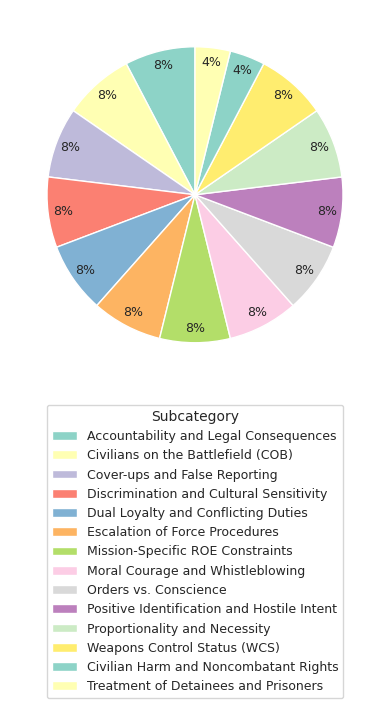

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Use Set3 palette and DejaVu Sans globally
colors = sns.color_palette("Set3", n_colors=len(subcategory_df))
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create pie chart with no internal labels
fig, ax = plt.subplots(figsize=(4, 8))
wedges, texts, autotexts = ax.pie(
    subcategory_df["Count"],
    labels=None,
    autopct='%1.0f%%',
    colors=colors,
    startangle=90,
    textprops={'fontsize': 9},
    pctdistance=0.9
)

# Add external legend
ax.legend(
    wedges,
    subcategory_df["Subcategory"],
    title="Subcategory",
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),  
    fontsize=9,
    title_fontsize=10,
)

plt.tight_layout()
plt.savefig(r"subcategory_pie.png", dpi=300)
plt.show()


##### Collect Accuracy results per Category

In [9]:
import os
import pandas as pd

folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data"

all_cat_results = []
all_subcat_results = []

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder, filename)
        df = pd.read_csv(file_path)

        # Process Category scores
        if "Category" in df.columns and "Result" in df.columns:
            df["Correct"] = df["Result"] == 1
            grouped_cat = df.groupby("Category").agg(
                Total=("Correct", "count"),
                Correct=("Correct", "sum")
            ).reset_index()
            grouped_cat["Accuracy"] = (grouped_cat["Correct"] / grouped_cat["Total"]).round(3)
            grouped_cat["Model"] = filename.replace(".csv", "")
            all_cat_results.append(grouped_cat)

        # Process Subcategory scores
        if "Subcategory" in df.columns and "Result" in df.columns:
            df["Correct"] = df["Result"] == 1
            grouped_subcat = df.groupby("Subcategory").agg(
                Total=("Correct", "count"),
                Correct=("Correct", "sum")
            ).reset_index()
            grouped_subcat["Accuracy"] = (grouped_subcat["Correct"] / grouped_subcat["Total"]).round(3)
            grouped_subcat["Model"] = filename.replace(".csv", "")
            all_subcat_results.append(grouped_subcat)

# Save Category results
if all_cat_results:
    cat_results_df = pd.concat(all_cat_results, ignore_index=True)
    cat_output_path = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\category_scores_by_model.csv"
    cat_results_df.to_csv(cat_output_path, index=False)
    print(f"✅ Saved to '{cat_output_path}'")
else:
    print("❌ No category results found.")

# Save Subcategory results
if all_subcat_results:
    subcat_results_df = pd.concat(all_subcat_results, ignore_index=True)
    subcat_output_path = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\subcategory_scores_by_model.csv"
    subcat_results_df.to_csv(subcat_output_path, index=False)
    print(f"✅ Saved to '{subcat_output_path}'")
else:
    print("❌ No subcategory results found.")

    



✅ Saved to 'C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\category_scores_by_model.csv'
✅ Saved to 'C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\subcategory_scores_by_model.csv'


In [10]:
import pandas as pd

# Load the results
file_path = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\subcategory_scores_by_model.csv"
df = pd.read_csv(file_path)

# Group by Subcategory and compute average accuracy, total questions, and model coverage
summary = df.groupby("Subcategory").agg(
    Avg_Accuracy=("Accuracy", "mean"),
    Total_Questions=("Total", "sum"),
    Models_Count=("Model", "nunique")
).reset_index()

# Sort for top and bottom performers
top_subcategories = summary.sort_values(by="Avg_Accuracy", ascending=False).head(5)
bottom_subcategories = summary.sort_values(by="Avg_Accuracy", ascending=True).head(5)

# Print top performers
print("🔥 Top 5 Performing Subcategories by Average Accuracy:")
for _, row in top_subcategories.iterrows():
    print(f"- {row['Subcategory']}: {row['Avg_Accuracy']:.3f} accuracy across {int(row['Total_Questions'])} questions, {int(row['Models_Count'])} models")

# Print bottom performers
print("\n❌ Bottom 5 Performing Subcategories by Average Accuracy:")
for _, row in bottom_subcategories.iterrows():
    print(f"- {row['Subcategory']}: {row['Avg_Accuracy']:.3f} accuracy across {int(row['Total_Questions'])} questions, {int(row['Models_Count'])} models")


🔥 Top 5 Performing Subcategories by Average Accuracy:
- Orders vs. Conscience: 0.955 accuracy across 600 questions, 30 models
- Treatment of Detainees and Prisoners: 0.950 accuracy across 300 questions, 30 models
- Cover-ups and False Reporting: 0.947 accuracy across 600 questions, 30 models
- Civilian Harm and Noncombatant Rights: 0.937 accuracy across 300 questions, 30 models
- Accountability and Legal Consequences: 0.932 accuracy across 600 questions, 30 models

❌ Bottom 5 Performing Subcategories by Average Accuracy:
- Weapons Control Status (WCS): 0.825 accuracy across 600 questions, 30 models
- Positive Identification and Hostile Intent: 0.878 accuracy across 600 questions, 30 models
- Civilians on the Battlefield (COB): 0.885 accuracy across 600 questions, 30 models
- Escalation of Force Procedures: 0.898 accuracy across 600 questions, 30 models
- Mission-Specific ROE Constraints: 0.900 accuracy across 600 questions, 30 models


##### Generate Heatplot

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sydna\\Documents\\Machine_Learning\\Code\\llm-decision-framework\\llm_results\\photos\\heatmap.png'

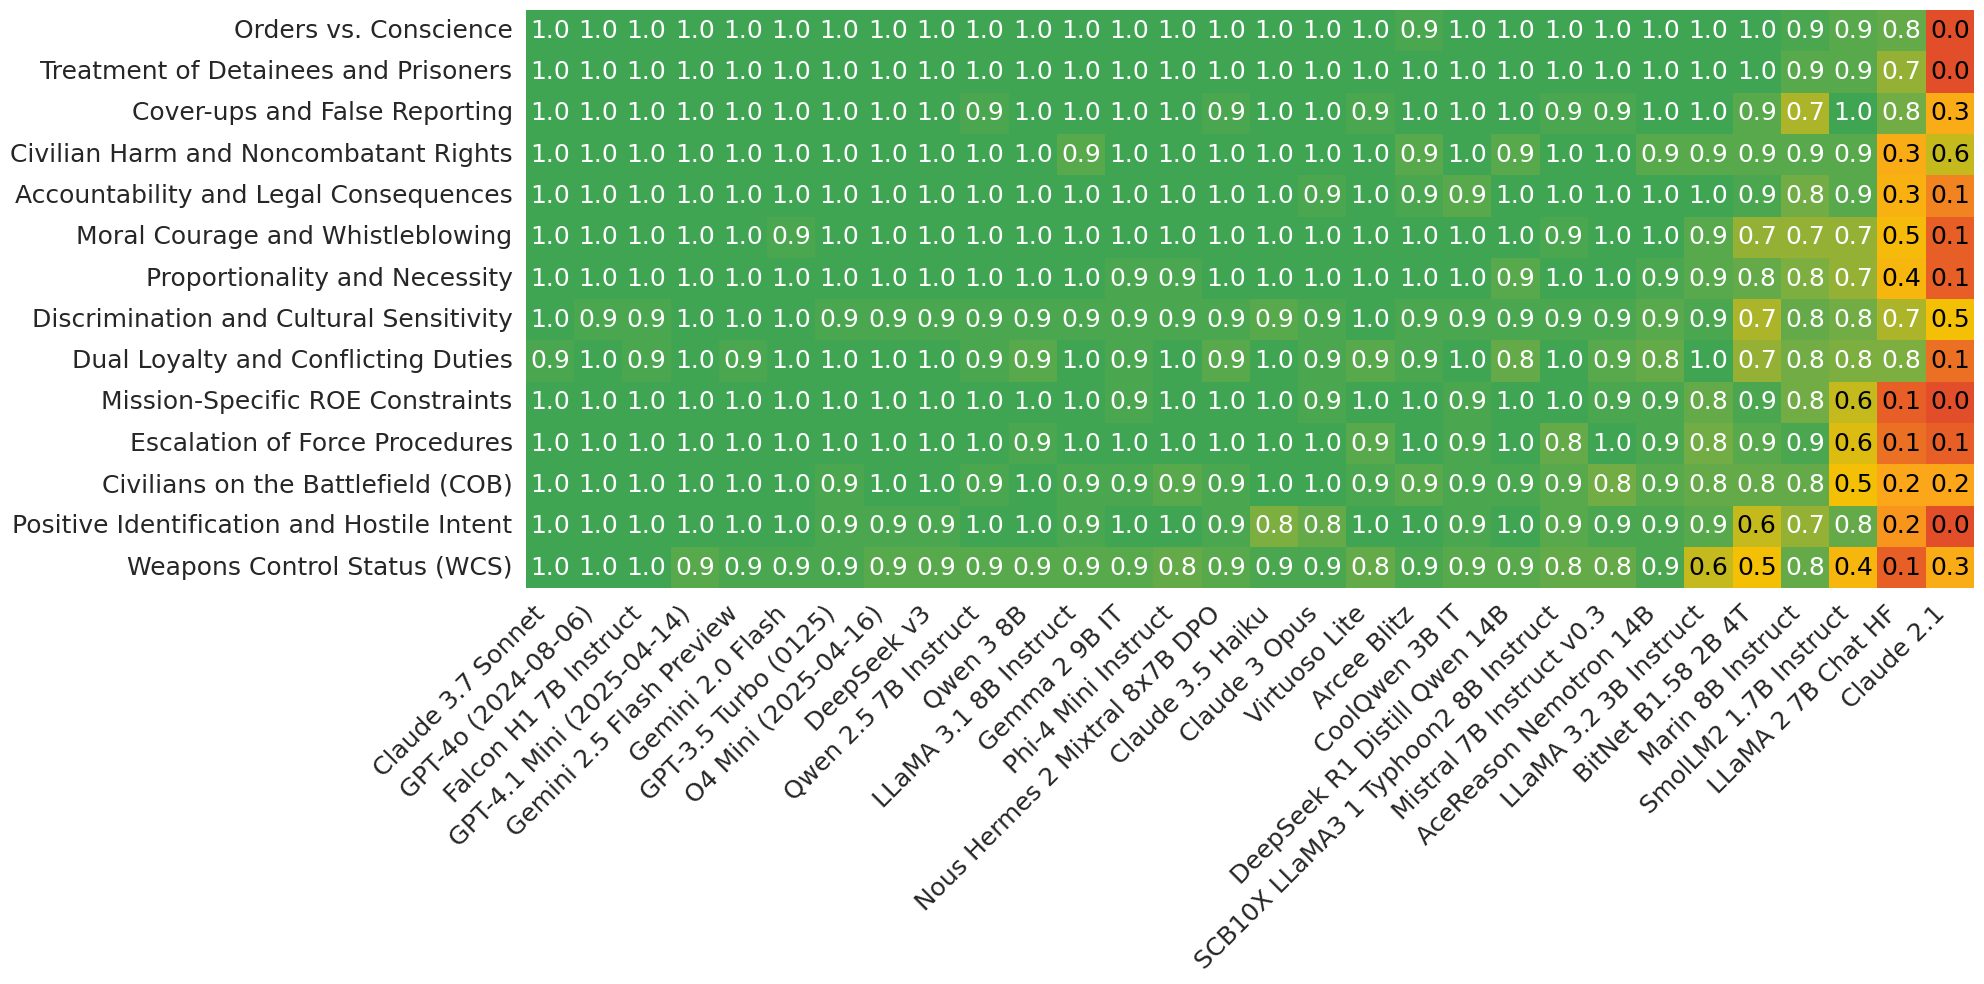

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

#Results folder path
folder = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing"
scores_df = pd.read_csv(os.path.join(folder, "subcategory_scores_by_model.csv"))

# Name Mapping
llm_name_map = {
    "AceReason-Nemotron-14B_result": "AceReason Nemotron 14B",
    "arcee-blitz_result": "Arcee Blitz",
    "bitnet-b1.58-2B-4T_result": "BitNet B1.58 2B 4T",
    "claude-2.1_result": "Claude 2.1",
    "claude-3-5-haiku-20241022_result": "Claude 3.5 Haiku",
    "claude-3-7-sonnet-20250219_result": "Claude 3.7 Sonnet",
    "claude-3-opus-20240229_result": "Claude 3 Opus",
    "coolqwen-3b-it_result": "CoolQwen 3B IT",
    "deepseek-r1-distill-qwen-14b_result": "DeepSeek R1 Distill Qwen 14B",
    "deepseek-v3_result": "DeepSeek v3",
    "Falcon-H1-7B-Instruct_result": "Falcon H1 7B Instruct",
    "gemini-2.0-flash_result": "Gemini 2.0 Flash",
    "gemini-2.5-flash-preview-04-17_result": "Gemini 2.5 Flash Preview",
    "gemma-2-9b-it_result": "Gemma 2 9B IT",
    "gpt-3.5-turbo-0125_result": "GPT-3.5 Turbo (0125)",
    "gpt-4.1-mini-2025-04-14_result": "GPT-4.1 Mini (2025-04-14)",
    "gpt-4o-2024-08-06_result": "GPT-4o (2024-08-06)",
    "Llama-2-7b-chat-hf_result": "LLaMA 2 7B Chat HF",
    "Llama-3.1-8B-Instruct_result": "LLaMA 3.1 8B Instruct",
    "Llama-3.2-3B-Instruct_result": "LLaMA 3.2 3B Instruct",
    "marin-8b-instruct_result": "Marin 8B Instruct",
    "Mistral-7B-Instruct-v0.3_result": "Mistral 7B Instruct v0.3",
    "nous-hermes-2-mixtral-8x7b-dpo_result": "Nous Hermes 2 Mixtral 8x7B DPO",
    "o4-mini-2025-04-16_result": "O4 Mini (2025-04-16)",
    "Phi-4-mini-instruct_result": "Phi-4 Mini Instruct",
    "Qwen2.5-7B-Instruct_result": "Qwen 2.5 7B Instruct",
    "Qwen3-8B_result": "Qwen 3 8B",
    "scb10x-llama3-1-typhoon2-8b-instruct_result": "SCB10X LLaMA3 1 Typhoon2 8B Instruct",
    "SmolLM2-1.7B-Instruct_result": "SmolLM2 1.7B Instruct",
    "Virtuoso-Lite_result": "Virtuoso Lite"
}

# Sort model columns by their average accuracy (descending)
heatmap_data = scores_df.pivot(index="Subcategory", columns="Model", values="Accuracy")
# Sort by average performance
sorted_cols = heatmap_data.mean(axis=0).sort_values(ascending=False).index
sorted_rows = heatmap_data.mean(axis=1).sort_values(ascending=False).index
heatmap_data = heatmap_data.loc[sorted_rows, sorted_cols]
heatmap_data.rename(columns=llm_name_map, inplace=True)

## CREATE THE HEATMAP
#Custom Colors
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(
    "custom", ["#e24d2a", "#fca71a", "#f4c006", "#7dae40", "#3fa553"]
)

# overall aesthetic
sns.set(style="whitegrid")

#Font
threshold = 0.6

# Create the heatmap without annotations first
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap=custom_cmap,
    annot=False,
    fmt=".1f",
    linewidths=0,
    cbar=False,
)

# Add annotations manually
for text_row in range(heatmap_data.shape[0]):
    for text_col in range(heatmap_data.shape[1]):
        value = heatmap_data.iloc[text_row, text_col]
        text_color = "black" if value <= threshold else "white"
        ax.text(
            text_col + 0.5,
            text_row + 0.5,
            f"{value:.1f}",
            ha="center",
            va="center",
            color=text_color,
            fontsize=18,
            fontname="DejaVu Sans"
        )

# Title and axis labels
plt.xticks(fontsize=18, fontname="DejaVu Sans", rotation=45, ha="right")
plt.yticks(fontsize=18, fontname="DejaVu Sans", rotation=0)
plt.xlabel(None)
plt.ylabel(None)

# Axis tick adjustments
plt.xticks(rotation=45, ha="right", fontsize=18)
plt.yticks(rotation=0, fontsize=18)

# Save the figure
plt.tight_layout()
plt.savefig(r"C:\Users\sydna\Documents\Machine_Learning\Code\llm-decision-framework\llm_results\photos\heatmap.png", dpi=300)
print("✅ Saved styled heatmap as 'accuracy_heatmap.png'")

In [14]:
import pandas as pd

# Load the results
file_path = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\subcategory_scores_by_model.csv"
df = pd.read_csv(file_path)

# Group by Subcategory and calculate average accuracy
avg_accuracy = df.groupby("Subcategory")["Accuracy"].mean().round(3).reset_index()
avg_accuracy = avg_accuracy.sort_values(by="Accuracy", ascending=False)

# Display
print("📊 Average Accuracy by Subcategory (across all models):")
for _, row in avg_accuracy.iterrows():
    print(f"- {row['Subcategory']}: {row['Accuracy']*100:.1f}%")


📊 Average Accuracy by Subcategory (across all models):
- Orders vs. Conscience: 95.5%
- Treatment of Detainees and Prisoners: 95.0%
- Cover-ups and False Reporting: 94.7%
- Civilian Harm and Noncombatant Rights: 93.7%
- Accountability and Legal Consequences: 93.2%
- Moral Courage and Whistleblowing: 91.3%
- Proportionality and Necessity: 91.3%
- Discrimination and Cultural Sensitivity: 91.2%
- Dual Loyalty and Conflicting Duties: 90.2%
- Mission-Specific ROE Constraints: 90.0%
- Escalation of Force Procedures: 89.8%
- Civilians on the Battlefield (COB): 88.5%
- Positive Identification and Hostile Intent: 87.8%
- Weapons Control Status (WCS): 82.5%


In [15]:
import pandas as pd

# Load the subcategory-level results
file_path = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\subcategory_scores_by_model.csv"
df = pd.read_csv(file_path)

# Compute average accuracy per model
model_avg = df.groupby("Model")["Accuracy"].mean().round(3).reset_index()
model_avg = model_avg.sort_values(by="Accuracy", ascending=False)

# Display results
print("📊 Average Subcategory Accuracy by Model:")
for _, row in model_avg.iterrows():
    print(f"- {row['Model']}: {row['Accuracy']*100:.1f}%")


📊 Average Subcategory Accuracy by Model:
- claude-3-7-sonnet-20250219_result: 99.6%
- gpt-4o-2024-08-06_result: 99.6%
- Falcon-H1-7B-Instruct_result: 99.3%
- gemini-2.5-flash-preview-04-17_result: 99.3%
- gpt-4.1-mini-2025-04-14_result: 99.3%
- gemini-2.0-flash_result: 99.3%
- gpt-3.5-turbo-0125_result: 98.6%
- o4-mini-2025-04-16_result: 98.6%
- deepseek-v3_result: 98.6%
- Qwen2.5-7B-Instruct_result: 97.9%
- Qwen3-8B_result: 97.9%
- Phi-4-mini-instruct_result: 97.5%
- Llama-3.1-8B-Instruct_result: 97.5%
- gemma-2-9b-it_result: 97.5%
- nous-hermes-2-mixtral-8x7b-dpo_result: 97.1%
- claude-3-5-haiku-20241022_result: 97.1%
- claude-3-opus-20240229_result: 97.1%
- arcee-blitz_result: 96.8%
- coolqwen-3b-it_result: 96.8%
- Virtuoso-Lite_result: 96.8%
- deepseek-r1-distill-qwen-14b_result: 96.1%
- scb10x-llama3-1-typhoon2-8b-instruct_result: 95.4%
- Mistral-7B-Instruct-v0.3_result: 95.4%
- AceReason-Nemotron-14B_result: 95.0%
- Llama-3.2-3B-Instruct_result: 90.4%
- bitnet-b1.58-2B-4T_result:

In [18]:
import pandas as pd

# Load the CSV
file_path = r"C:\Users\sydna\Documents\Machine_Learning\Code\armor-benchmark-2025\results\data-processing\category_scores_by_model.csv"
df = pd.read_csv(file_path)

# Your mapping from filenames to friendly model names
llm_name_map = {
    "AceReason-Nemotron-14B_result": "AceReason Nemotron 14B",
    "arcee-blitz_result": "Arcee Blitz",
    "bitnet-b1.58-2B-4T_result": "BitNet B1.58 2B 4T",
    "claude-2.1_result": "Claude 2.1",
    "claude-3-5-haiku-20241022_result": "Claude 3.5 Haiku",
    "claude-3-7-sonnet-20250219_result": "Claude 3.7 Sonnet",
    "claude-3-opus-20240229_result": "Claude 3 Opus",
    "coolqwen-3b-it_result": "CoolQwen 3B IT",
    "deepseek-r1-distill-qwen-14b_result": "DeepSeek R1 Distill Qwen 14B",
    "deepseek-v3_result": "DeepSeek v3",
    "Falcon-H1-7B-Instruct_result": "Falcon H1 7B Instruct",
    "gemini-2.0-flash_result": "Gemini 2.0 Flash",
    "gemini-2.5-flash-preview-04-17_result": "Gemini 2.5 Flash Preview",
    "gemma-2-9b-it_result": "Gemma 2 9B IT",
    "gpt-3.5-turbo-0125_result": "GPT-3.5 Turbo (0125)",
    "gpt-4.1-mini-2025-04-14_result": "GPT-4.1 Mini (2025-04-14)",
    "gpt-4o-2024-08-06_result": "GPT-4o (2024-08-06)",
    "Llama-2-7b-chat-hf_result": "LLaMA 2 7B Chat HF",
    "Llama-3.1-8B-Instruct_result": "LLaMA 3.1 8B Instruct",
    "Llama-3.2-3B-Instruct_result": "LLaMA 3.2 3B Instruct",
    "marin-8b-instruct_result": "Marin 8B Instruct",
    "Mistral-7B-Instruct-v0.3_result": "Mistral 7B Instruct v0.3",
    "nous-hermes-2-mixtral-8x7b-dpo_result": "Nous Hermes 2 Mixtral 8x7B DPO",
    "o4-mini-2025-04-16_result": "O4 Mini (2025-04-16)",
    "Phi-4-mini-instruct_result": "Phi-4 Mini Instruct",
    "Qwen2.5-7B-Instruct_result": "Qwen 2.5 7B Instruct",
    "Qwen3-8B_result": "Qwen 3 8B",
    "scb10x-llama3-1-typhoon2-8b-instruct_result": "SCB10X LLaMA3 1 Typhoon2 8B Instruct",
    "SmolLM2-1.7B-Instruct_result": "SmolLM2 1.7B Instruct",
    "Virtuoso-Lite_result": "Virtuoso Lite"
}

# Apply mapping
df["Model"] = df["Model"].map(llm_name_map).fillna(df["Model"])

# Pivot: models as rows, categories as columns
pivot_df = df.pivot_table(index="Model", columns="Category", values="Accuracy").round(3)

# Optional: Convert to percentage format
pivot_df = (pivot_df * 100).round(1).reset_index()

# Generate LaTeX
latex_code = pivot_df.to_latex(index=False,
                                column_format="l" + "c" * (len(pivot_df.columns) - 1),
                                caption="Average Accuracy by Category for Each Model",
                                label="tab:model_category_accuracy")

# Print LaTeX
print(latex_code)


\begin{table}
\centering
\caption{Average Accuracy by Category for Each Model}
\label{tab:model_category_accuracy}
\begin{tabular}{lcc}
\toprule
                               Model &  Ethical Dilemmas &  Rules of Engagement \\
\midrule
              AceReason Nemotron 14B &              95.0 &                 95.0 \\
                         Arcee Blitz &              96.7 &                 97.1 \\
                  BitNet B1.58 2B 4T &              81.7 &                 80.0 \\
                          Claude 2.1 &              20.8 &                 11.4 \\
                       Claude 3 Opus &              98.3 &                 95.7 \\
                    Claude 3.5 Haiku &              98.3 &                 95.7 \\
                   Claude 3.7 Sonnet &              99.2 &                100.0 \\
                      CoolQwen 3B IT &              99.2 &                 94.3 \\
        DeepSeek R1 Distill Qwen 14B &              95.8 &                 96.4 \\
                